In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.models import load_model
import cv2
import pickle
#from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
%config IPCompleter.greedy=True

Using TensorFlow backend.


In [14]:
#Loading training dataset
folder = r'C:\Users\i341657\OneDrive - SAP SE\Desktop\fellowship\fellowship\grape_leaf\train'
file_list = os.listdir(folder)
image_list=[]
labels = []
inputShape = (256,256,3)

In [41]:
#Intializing parameters
EPOCHS = 25
INIT_LR = 1e-3
batch = 32

In [6]:
#Function to convert image to array
def convert_image_to_array(image):
    im = cv2.imread(image)
    im = cv2.resize(im,(256,256))
    return img_to_array(im)

In [15]:
#Reading images and lables into the list
for f in file_list:
    images = os.listdir(folder+"\\"+f)
    for i in images[:200]:
        image_list.append(convert_image_to_array(folder+"\\"+f+"\\"+i))
        labels.append(f)

In [16]:
#Normalizing image-array
np_image_list = np.array(image_list,dtype=np.float16)/255.0

In [13]:
np_image_list.shape

(800, 256, 256, 3)

In [17]:
#Creating binary image-lables
label_binarize = LabelBinarizer()
image_labels = label_binarize.fit_transform(labels)

In [43]:
image_labels

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [18]:
pickle.dump(label_binarize,open('label.pkl','wb'))

In [58]:
#Printing class-lables
n_classes = len(label_binarize.classes_)
print(label_binarize.classes_)

['Grape___Black_rot' 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy']


In [40]:
x_train,x_test,y_train,y_test = train_test_split(np_image_list,image_labels,test_size=0.2,random_state=0)

In [20]:
aug = ImageDataGenerator(rotation_range=25,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")

In [35]:
#Designing the model
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(128,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [39]:
#Specifying optimizer and compile the model
optimizer = Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [42]:
#Training the model
model.fit_generator(aug.flow(x_train,y_train,batch_size=batch),validation_data=(x_test,y_test),steps_per_epoch=len(x_tain)//batch,epochs=EPOCHS,verbose=1)

Epoch 1/25
 3/20 [===>..........................] - ETA: 7:49 - loss: 2.4401 - acc: 0.3646

KeyboardInterrupt: 

In [4]:
#Loading the trained model
new_model = load_model(r'C:\Users\i341657\Downloads\grape_leaf_24.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)        0         
__________

In [55]:
new_model.evaluate(x_test,y_test)

160/160 [==============================] - 124s 773ms/step


[0.39163209199905397, 0.875]

In [7]:
sample_list = []
sample = convert_image_to_array(r'C:\Users\i341657\OneDrive - SAP SE\Desktop\fellowship\fellowship\grape_leaf\sample\0cfdea92-260f-42b2-9db9-c31fee6ec567___Mt.N.V_HL 6119.JPG')

In [8]:
sample_list.append(sample)

In [9]:
np_sample_list = np.array(sample_list,dtype=np.float16)/255.0

In [12]:
 sample_result = new_model.predict(np_sample_list)

In [11]:
new_model._make_predict_function()

In [13]:
res_index = np.argmax(sample_result)

In [17]:
lb.classes_[res_index]

'Grape___healthy'

In [ ]:
cv2.IMREAD_COLOR

In [6]:
f = open('history.pkl', 'rb')
history = pickle.load(f)

In [21]:
history['val_loss'][0:23]

[12.809622001647949,
 6.274267196655273,
 0.8414146065711975,
 6.081649208068848,
 7.53937520980835,
 6.460114669799805,
 1.2437312841415404,
 2.8290329456329344,
 2.273184585571289,
 1.2865896701812745,
 1.073606026172638,
 2.8907345056533815,
 4.330664491653442,
 1.278000009059906,
 0.9721823811531067,
 0.7533897876739502,
 0.9487377643585205,
 3.1894840717315676,
 1.3222692251205443,
 2.5381494998931884,
 0.34426970332860946,
 0.8971027851104736,
 0.447227843105793]

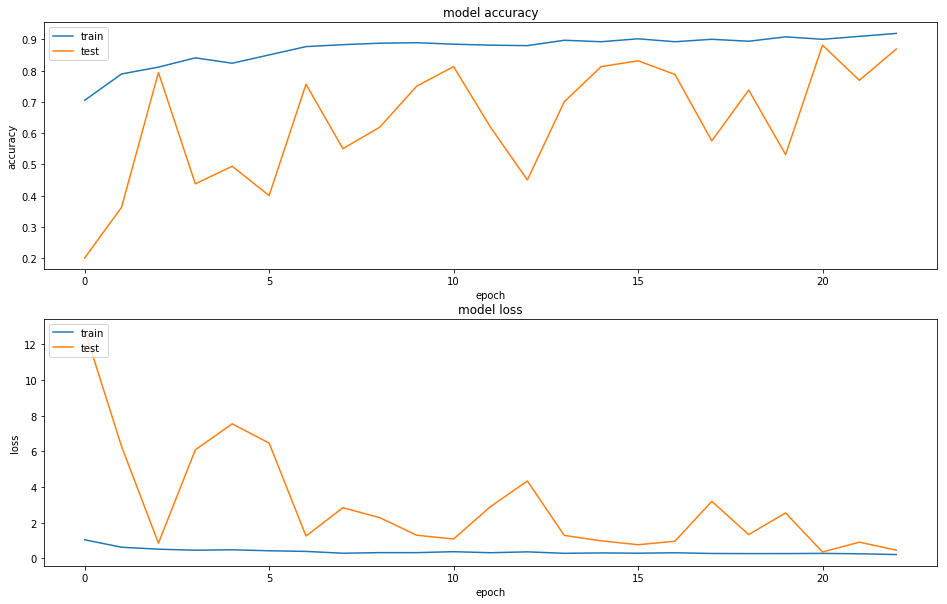

In [23]:
plt.figure(figsize=(16,10))  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history['acc'][0:23])  
plt.plot(history['val_acc'][0:23])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(212)  
plt.plot(history['loss'][0:23])  
plt.plot(history['val_loss'][0:23])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.savefig('keras_model_history.png')